In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

### You can download the csv file at https://www.dropbox.com/s/zs88zakc03zjxtr/UCR65_16.csv.zip?dl=1

In [2]:
df = pd.read_csv('UCR65_16.csv')
df['State'] = df.State.apply(lambda x: x.replace('Rhodes','Rhode')) # fix typo
df.head()

,ORI,Name,YEAR,MRD,CLR,State,County,Agency
0,AK00101,ANCHORAGE,1965,7,6,Alaska,"Anchorage, AK",Anchorage
1,AK00101,ANCHORAGE,1966,18,16,Alaska,"Anchorage, AK",Anchorage
2,AK00101,ANCHORAGE,1967,1,1,Alaska,"Anchorage, AK",Anchorage
3,AK00101,ANCHORAGE,1968,7,5,Alaska,"Anchorage, AK",Anchorage
4,AK00101,ANCHORAGE,1969,7,4,Alaska,"Anchorage, AK",Anchorage


In [3]:
state_grp = df[['State','MRD','CLR']].groupby('State').sum()
state_grp['Solve_Rate'] = state_grp['CLR'] / state_grp['MRD']
state_grp.sort_values(by='Solve_Rate', inplace=True, ascending=False)
state_grp.head()

,MRD,CLR,Solve_Rate
State,,,
Wyoming,933,805,0.862808
North Carolina,27964,23153,0.827957
North Dakota,458,376,0.820961
Oklahoma,11209,9168,0.817914
Nebraska,2587,2115,0.817549


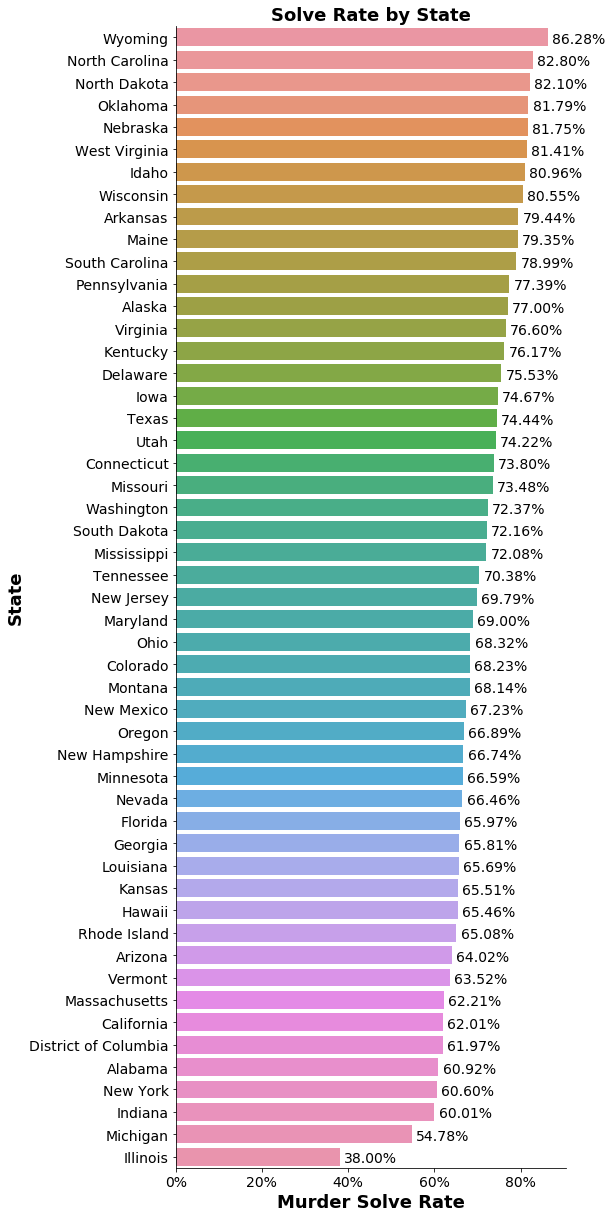

In [4]:
mpl.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(7,21))
sns.barplot(x='Solve_Rate',y=state_grp.index,data=state_grp)
sns.despine(ax=ax)
ax.set_xticklabels(["{:.0%}".format(i) for i in ax.get_xticks()])
ax.set_xlabel('Murder Solve Rate', fontsize=18, fontweight='bold')
ax.set_ylabel('State',fontsize=18, fontweight='bold')
ax.set_title('Solve Rate by State',fontsize=18,fontweight='bold')
labels = ["{:.2%}".format(i) for i in state_grp.Solve_Rate.values]
rects = ax.patches

for i, v in enumerate(state_grp.Solve_Rate.values):
    ax.text(v+.01, i + .25, '{:.2%}'.format(v))
plt.show()

In [5]:
grp_yr = df[['YEAR','MRD','CLR']].groupby('YEAR').sum()
grp_yr['Solve Rate'] = grp_yr['CLR'] / grp_yr['MRD']
grp_yr['UnSolved'] = grp_yr['MRD'] - grp_yr['CLR']
grp_yr.head()

,MRD,CLR,Solve Rate,UnSolved
YEAR,,,,
1965,8739,7292,0.834420,1447
1966,9446,7766,0.822147,1680
1967,10958,8828,0.805621,2130
1968,12453,9793,0.786397,2660
1969,13378,10647,0.795859,2731


In [6]:
# Bottom 5 Years by Solve Rate
grp_yr.sort_values(by='Solve Rate').head()

,MRD,CLR,Solve Rate,UnSolved
YEAR,,,,
2006,16824,9185,0.545946,7639
2007,16764,9250,0.551778,7514
2016,16891,9382,0.555444,7509
2003,15814,8849,0.559567,6965
2004,15607,8774,0.562184,6833


In [7]:
# Top 5 years with most unsolved murders
grp_yr.sort_values(by='UnSolved',ascending=False).head()

,MRD,CLR,Solve Rate,UnSolved
YEAR,,,,
1991,23957,15020,0.626957,8937
1995,20365,11765,0.577707,8600
1993,23402,14824,0.633450,8578
1994,22185,13780,0.621140,8405
1992,23016,14732,0.640076,8284


In [8]:
# Top 5 years with most solved murders
grp_yr.sort_values(by='CLR',ascending=False).head()

,MRD,CLR,Solve Rate,UnSolved
YEAR,,,,
1980,22454,16147,0.719115,6307
1979,21093,15507,0.735173,5586
1981,21733,15406,0.708876,6327
1975,19716,15350,0.778555,4366
1974,19558,15332,0.783925,4226


In [9]:
# top 5 years with the most overall murders
grp_yr.sort_values(by='MRD',ascending=False).head()

,MRD,CLR,Solve Rate,UnSolved
YEAR,,,,
1991,23957,15020,0.626957,8937
1993,23402,14824,0.633450,8578
1992,23016,14732,0.640076,8284
1990,22771,14963,0.657108,7808
1980,22454,16147,0.719115,6307


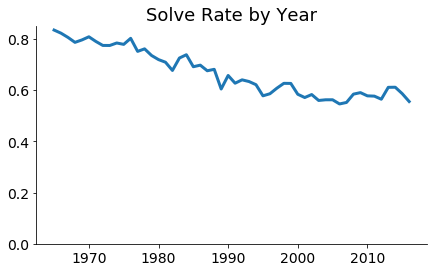

In [10]:
# quick plot of Solve Rate by Year
fig, ax = plt.subplots(figsize=(7,4))

ax.plot(grp_yr.index, grp_yr['Solve Rate'],linewidth=3)

ax.set_ylim(bottom=0)
ax.set_title('Solve Rate by Year',fontsize=18)
sns.despine(ax=ax)
plt.show()

In [11]:
# Credit for this cell to Randal Olson
# http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/

# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

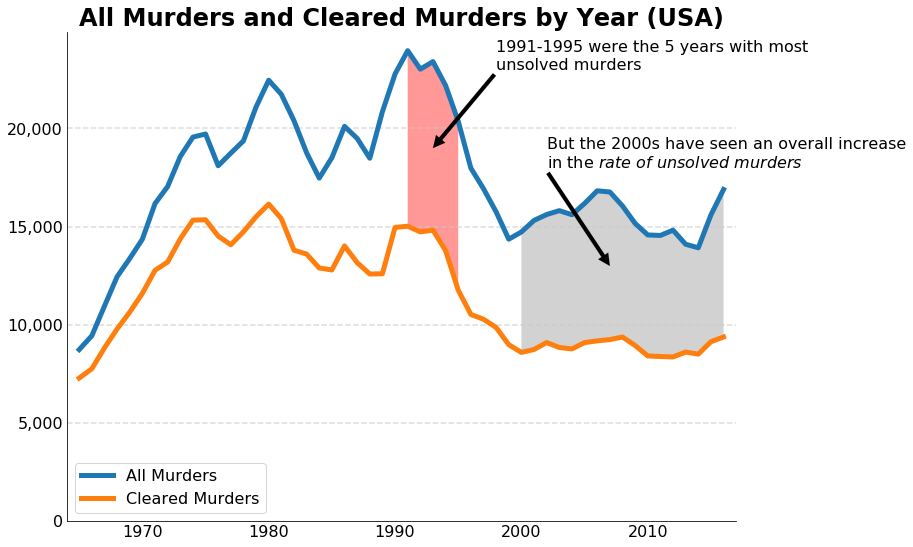

In [12]:
# set default font size to 16
mpl.rcParams.update({'font.size': 16})

# set up the figure and axis objects
fig, ax = plt.subplots(figsize=(12,9))

# Create a light gray, dashed, horizontal line across the chart at the yaxis tick labels
for tick in range(5000,21000,5000):
    ax.axhline(tick,ls='dashed',c=tableau20[15],alpha=0.6)

# plot all murders by year
all_murders, = ax.plot(grp_yr.index, grp_yr['MRD'],linewidth=5,c=tableau20[0])

# plot solved murders by year
solved, = ax.plot(grp_yr.index, grp_yr['CLR'],linewidth=5,c=tableau20[2])

# format the yaxis tick labels
ax.yaxis.set_ticklabels([f"{i:,.0f}" for i in range(0,21000,5000)])

# set the y axis limit to 0
ax.set_ylim(bottom=0)
ax.set_xlim(1964,2017)
# remove the top and right spines from the plot, ax.spines is a dictionary
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# remove the tick marks but keep the labels
ax.tick_params(axis='both', which='both', length=0) 

# Set the legend labels
solved.set_label('Cleared Murders')
all_murders.set_label('All Murders')
ax.legend(loc='lower left')

# set the title
ax.set_title('All Murders and Cleared Murders by Year (USA)',fontsize=24,fontweight='bold')

# fill in between the lines of the 5 years with the most unsolved murders
ax.fill_between(grp_yr.loc[1991:1995].index,grp_yr.loc[1991:1995]['MRD'],
                grp_yr.loc[1991:1995]['CLR'],
                facecolor= tableau20[7])
# plot in the 2000s where the unsolved rate increases
ax.fill_between(grp_yr.loc[2000:2016].index, grp_yr.loc[2000:2016]['MRD'],
               grp_yr.loc[2000:2016]['CLR'],facecolor=tableau20[15],alpha=0.8)

# annotate the chart
top5_annot = ax.annotate(s='1991-1995 were the 5 years with most\nunsolved murders',xy=(1993, 19000),xytext=(1998,23000),
           arrowprops=dict(linewidth=.1,facecolor='black',))
ax.annotate(s='But the 2000s have seen an overall increase\nin the ${rate\ of\ unsolved\ murders}$'
            ,xy=(2007,13000),xytext=(2002,18000),
           arrowprops=dict(linewidth=.1,facecolor='black',))

# even thought we called %matplotlib inline, calling plt.show()
# will eliminate some junk printed out above the chart
plt.show()